In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import Dataset cleaned in part 1

In [3]:
train_df = pd.read_csv('./data/inter/train_clean_1.csv')
train_df.sample(3)

FileNotFoundError: [Errno 2] File ./data/inter/train_clean_1.csv does not exist: './data/inter/train_clean_1.csv'

## The 'Category' column

#### It describes the Category of the crime commited. Let's check all the values it can take

In [3]:
all_cats = train_df.Category.unique()
all_cats.sort()
all_cats, len(all_cats)

(array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
        'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
        'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
        'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
        'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
        'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
        'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
        'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
        'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
        'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
        'WARRANTS', 'WEAPON LAWS'], dtype=object), 39)

- We can see that there are in total **39 unique values** this column can take

- Let's see how many crimes there are in each category to get a glimpse of the distribution :

In [4]:
gb = (train_df.groupby('Category')['Descript'].count()/len(train_df))*100
assert int(gb.sum()) == 100
gb.sort_values(inplace=True)
gb

Category
TREA                            0.000683
PORNOGRAPHY/OBSCENE MAT         0.002506
GAMBLING                        0.016628
SEX OFFENSES NON FORCIBLE       0.016856
EXTORTION                       0.029156
BRIBERY                         0.032914
BAD CHECKS                      0.046239
FAMILY OFFENSES                 0.055919
SUICIDE                         0.057856
EMBEZZLEMENT                    0.132794
LOITERING                       0.139514
ARSON                           0.172314
LIQUOR LAWS                     0.216731
RUNAWAY                         0.221628
DRIVING UNDER THE INFLUENCE     0.258300
KIDNAPPING                      0.266614
RECOVERED VEHICLE               0.357383
DRUNKENNESS                     0.487444
DISORDERLY CONDUCT              0.492000
SEX OFFENSES FORCIBLE           0.499744
STOLEN PROPERTY                 0.517055
TRESPASS                        0.834350
PROSTITUTION                    0.852344
WEAPON LAWS                     0.974319
SECONDA

#### We can clearly see that 15 of the categories account for ~93% of the crimes ! ( whereas the remaining 24 categories account only for ~7% )
- Let's make a quick visualization :

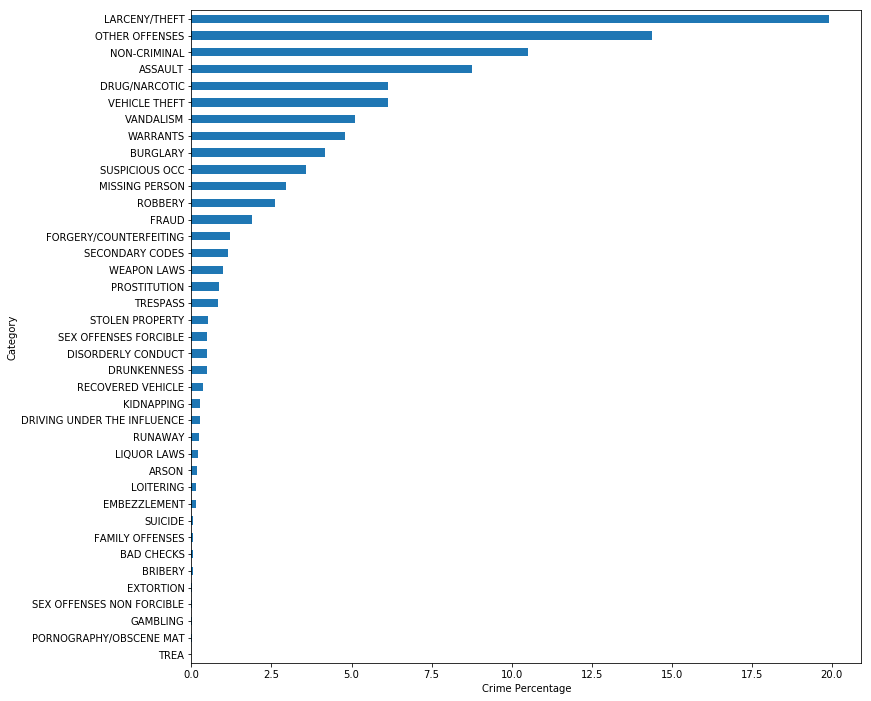

In [5]:
ax = gb.plot(kind='barh', figsize=(12,12) )
ax.set_xlabel('Crime Percentage')

#### Let's confirm if the same categories are always in the top each year

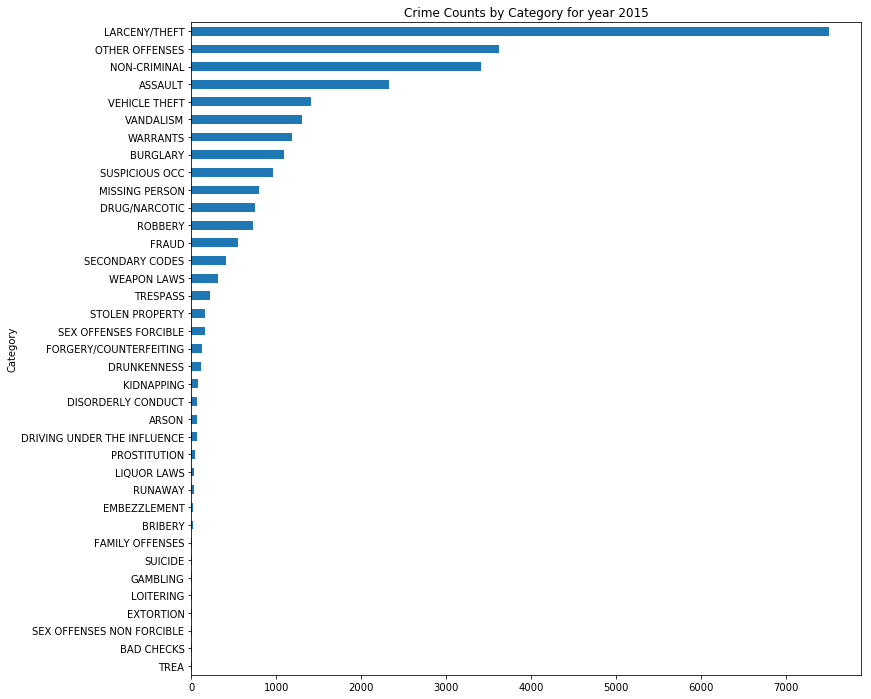

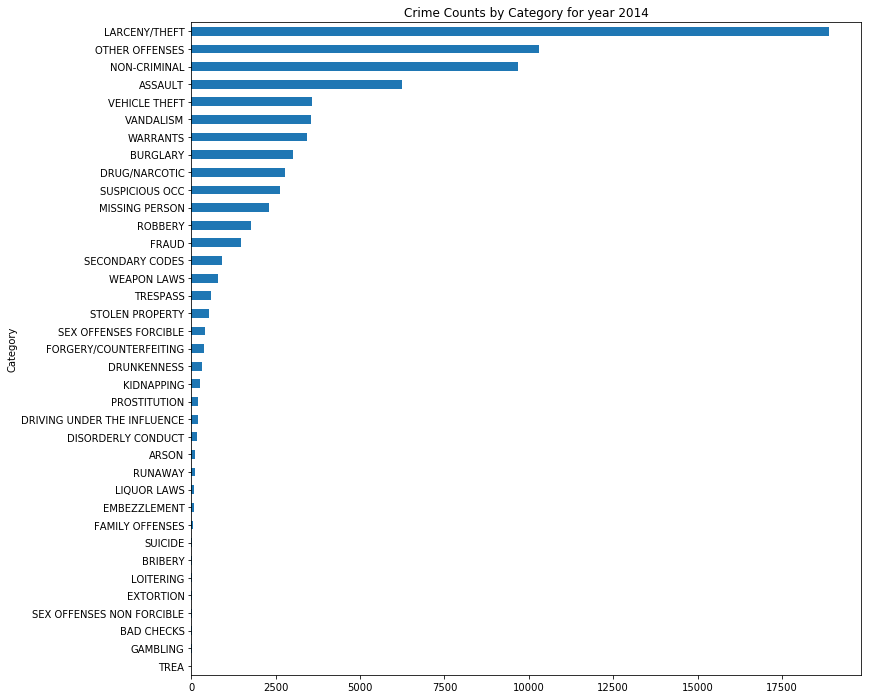

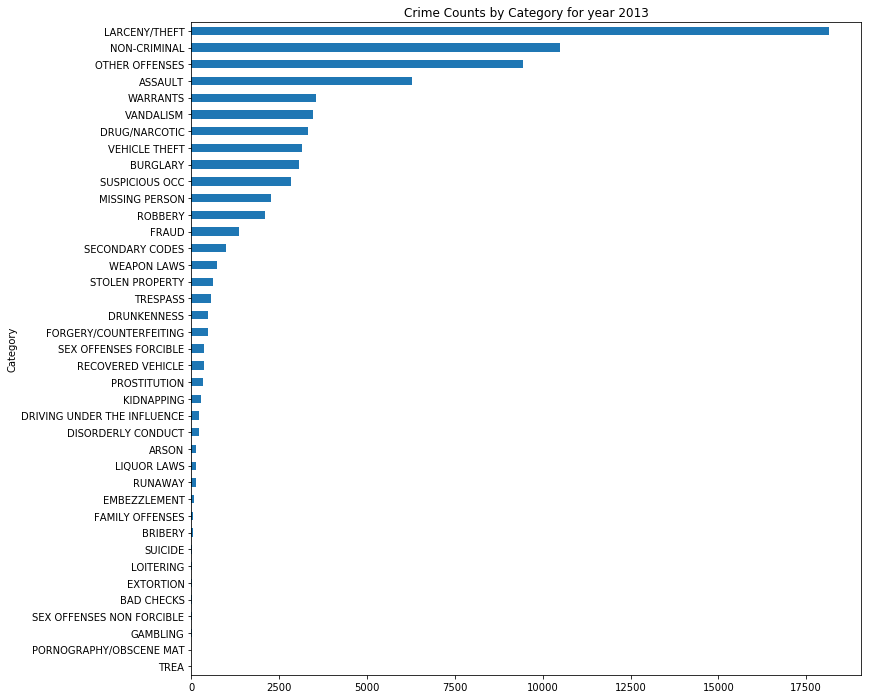

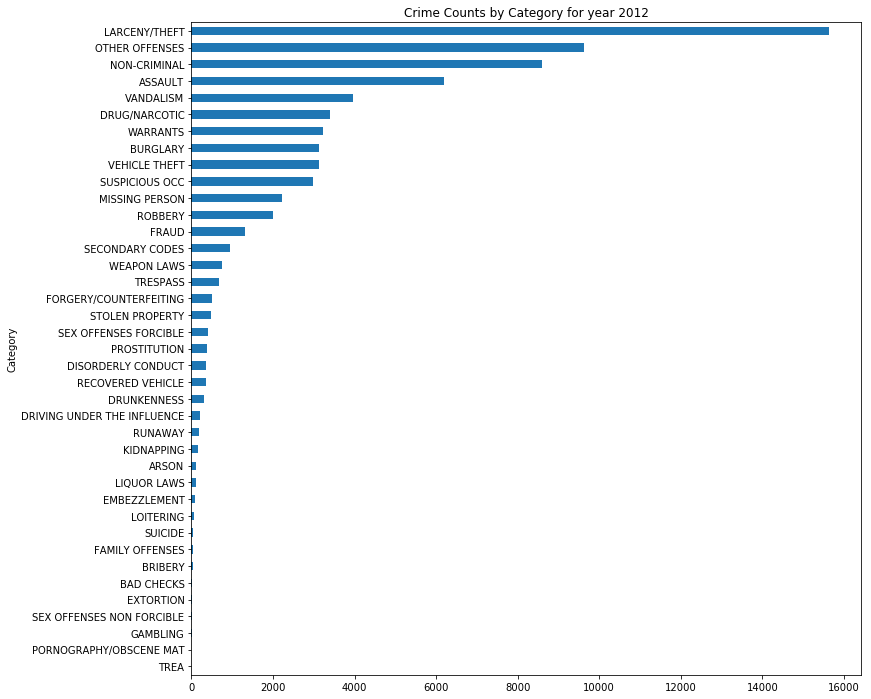

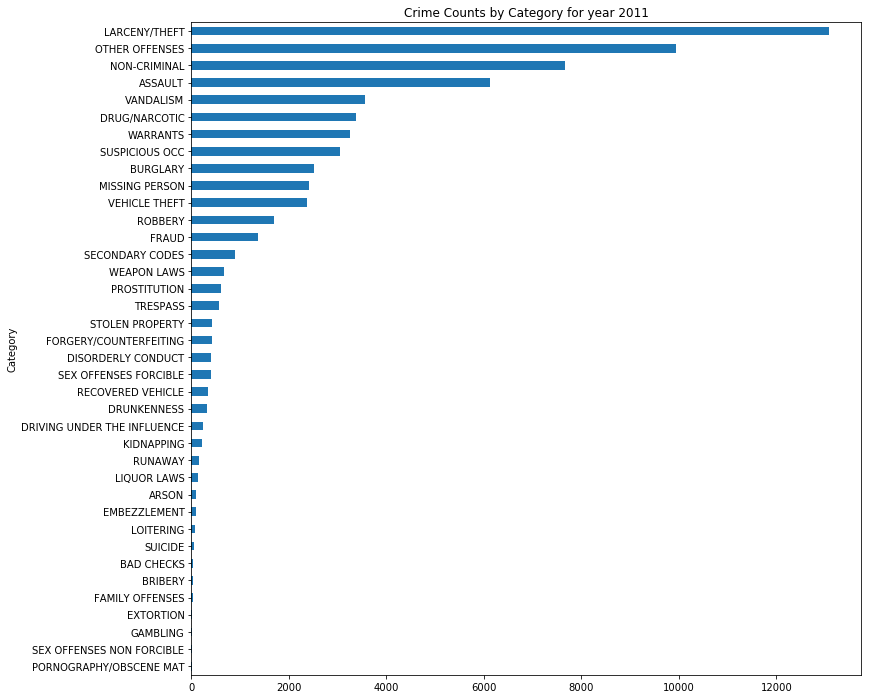

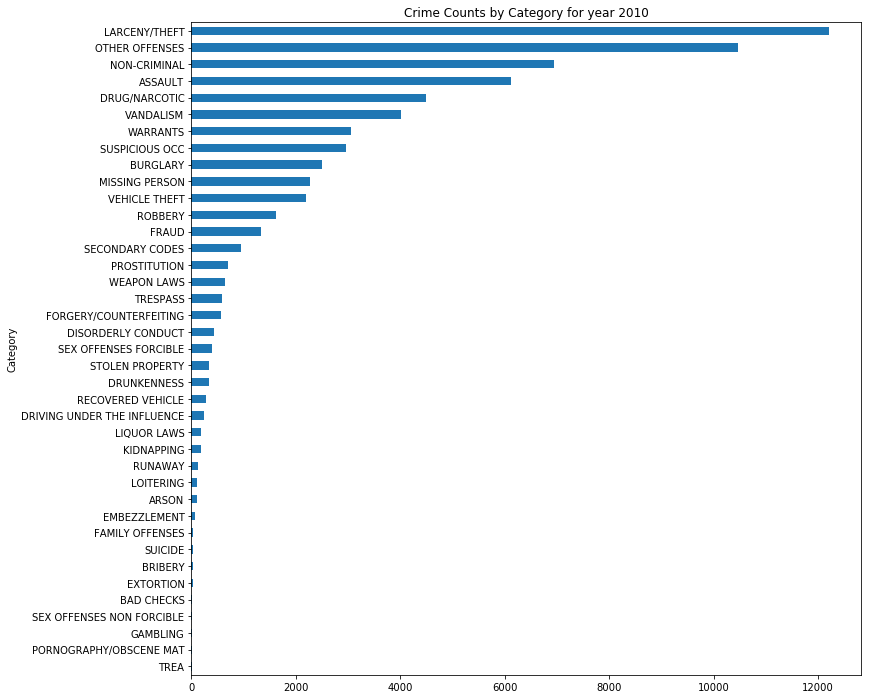

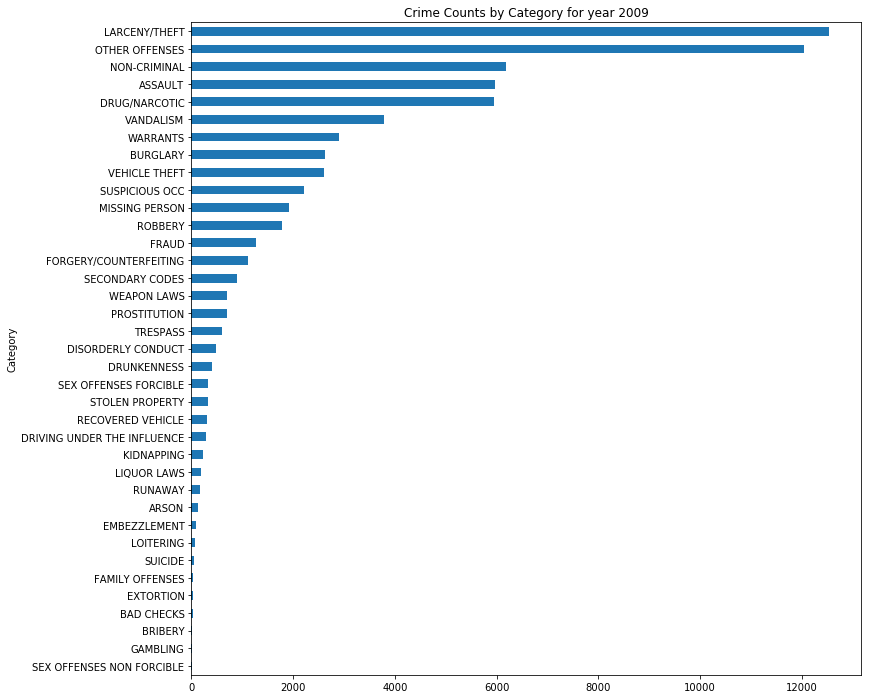

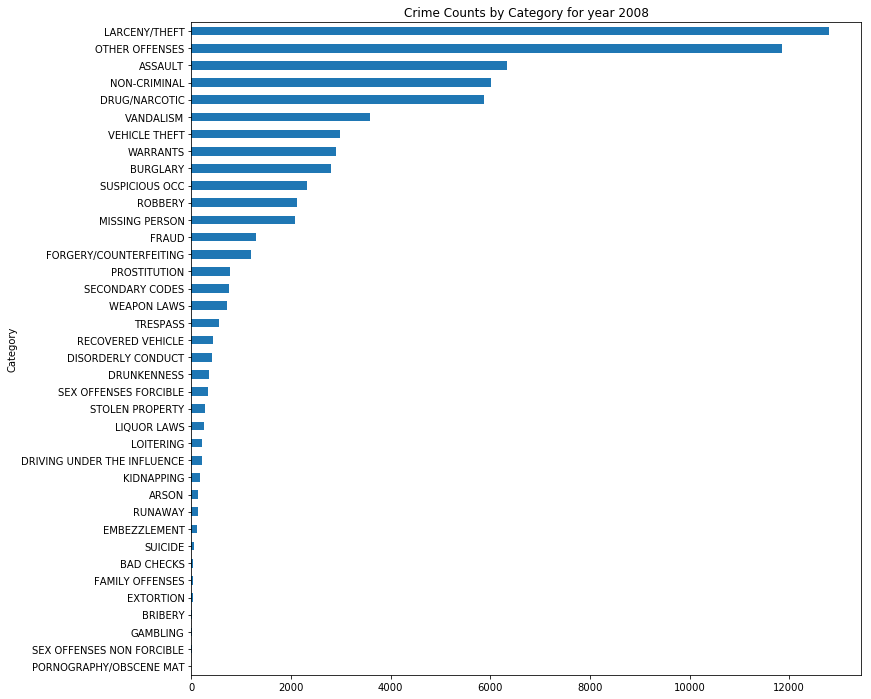

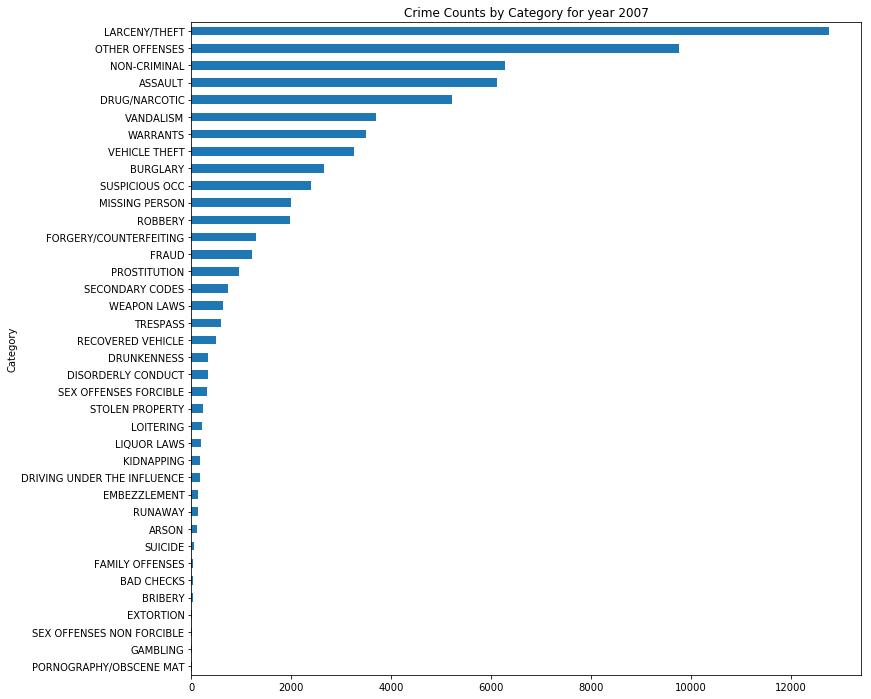

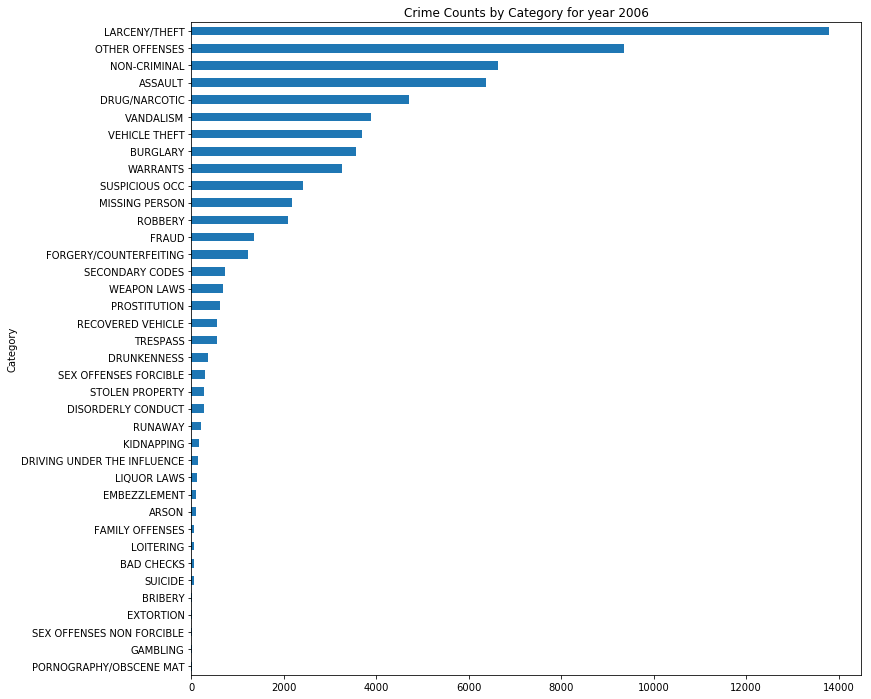

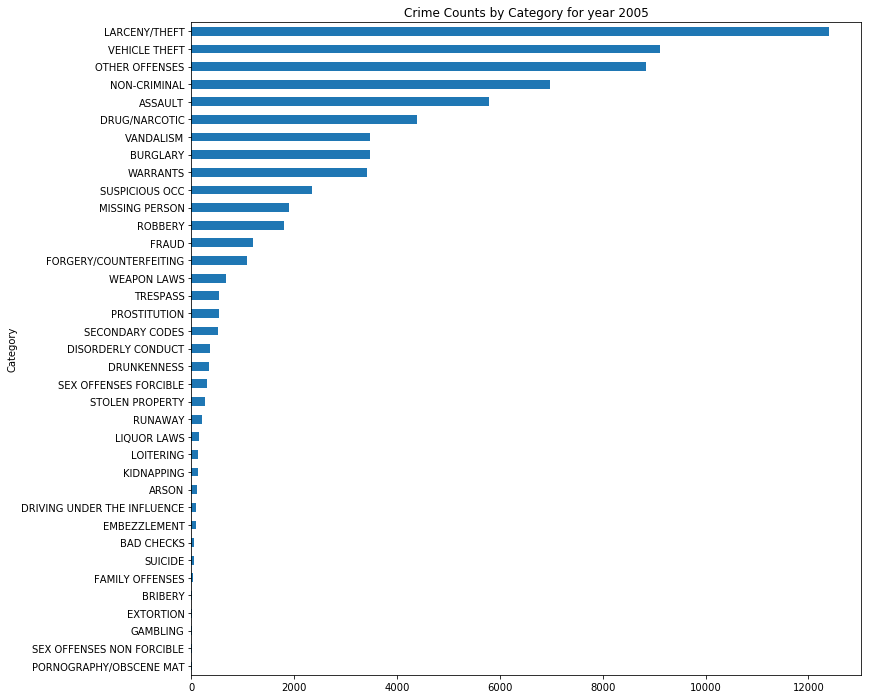

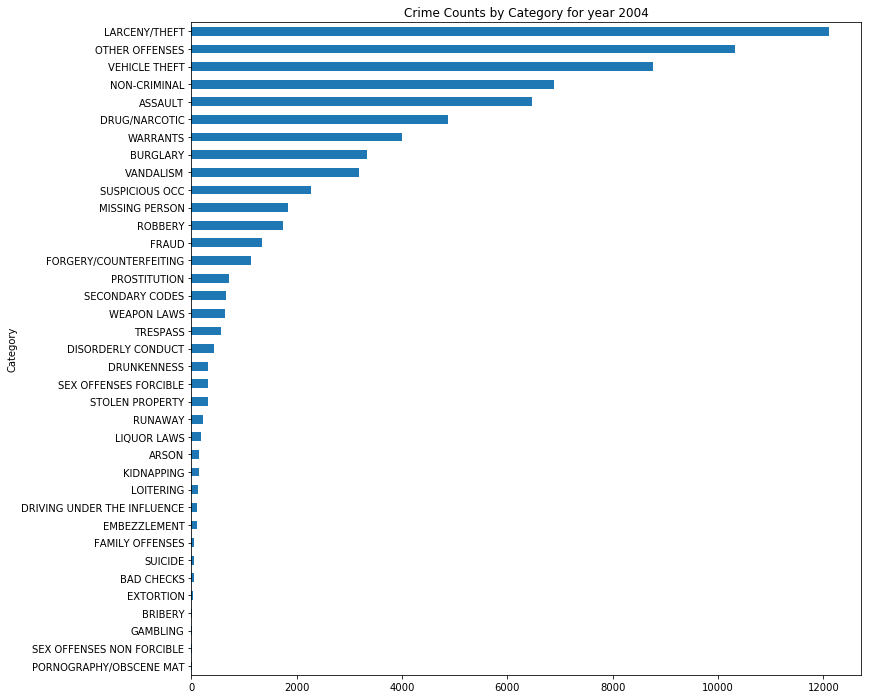

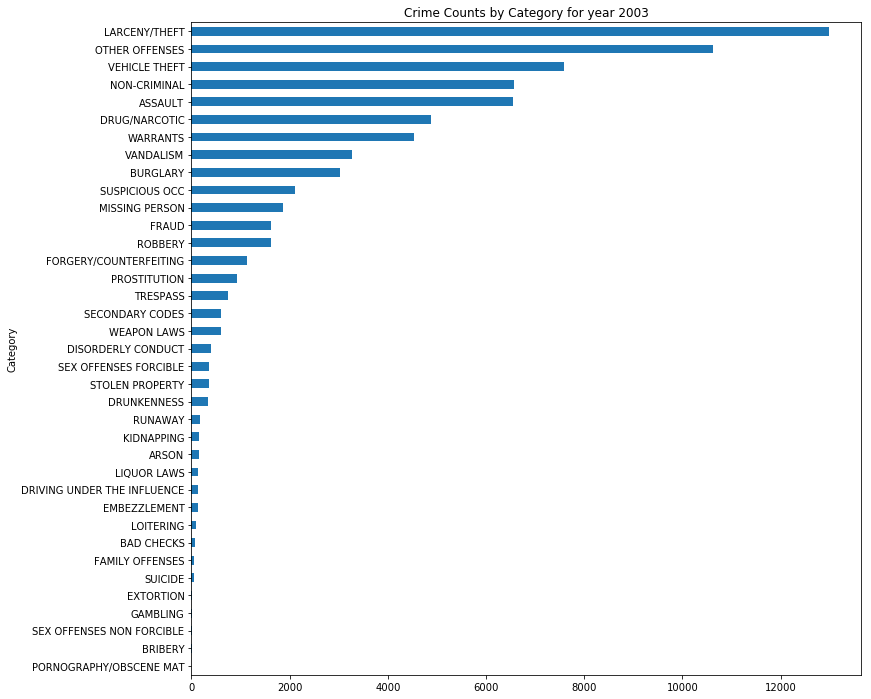

In [6]:
all_years = train_df.Year.unique()
for y in all_years:
    gb = train_df[train_df.Year == y].groupby('Category')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(12,12), title=f'Crime Counts by Category for year {y}')
    plt.show()

### Crime Categories by Day Of Week

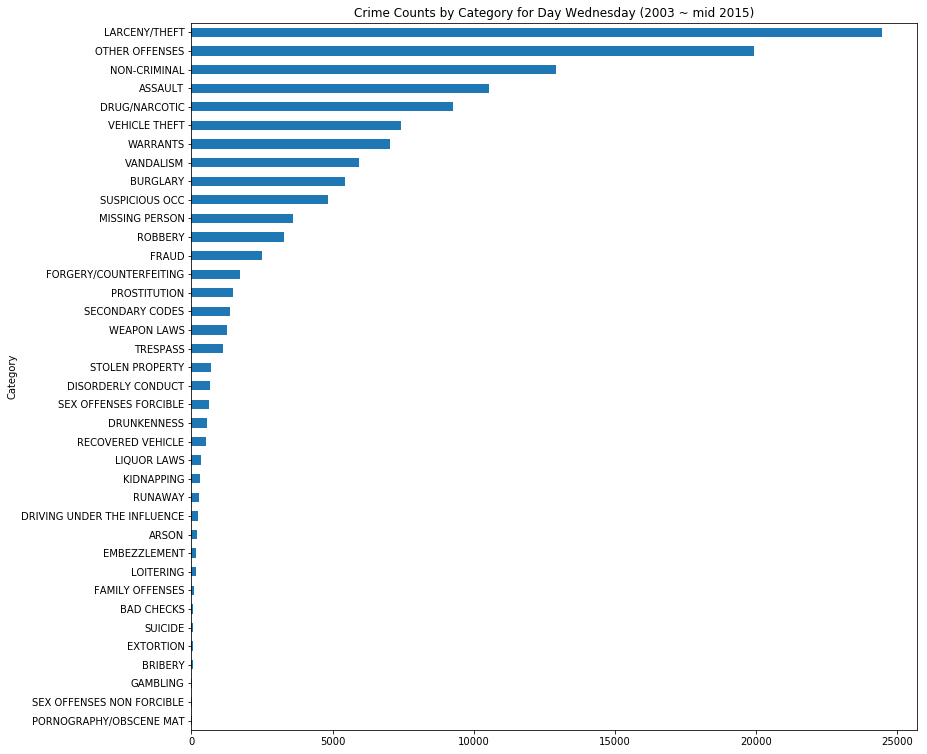

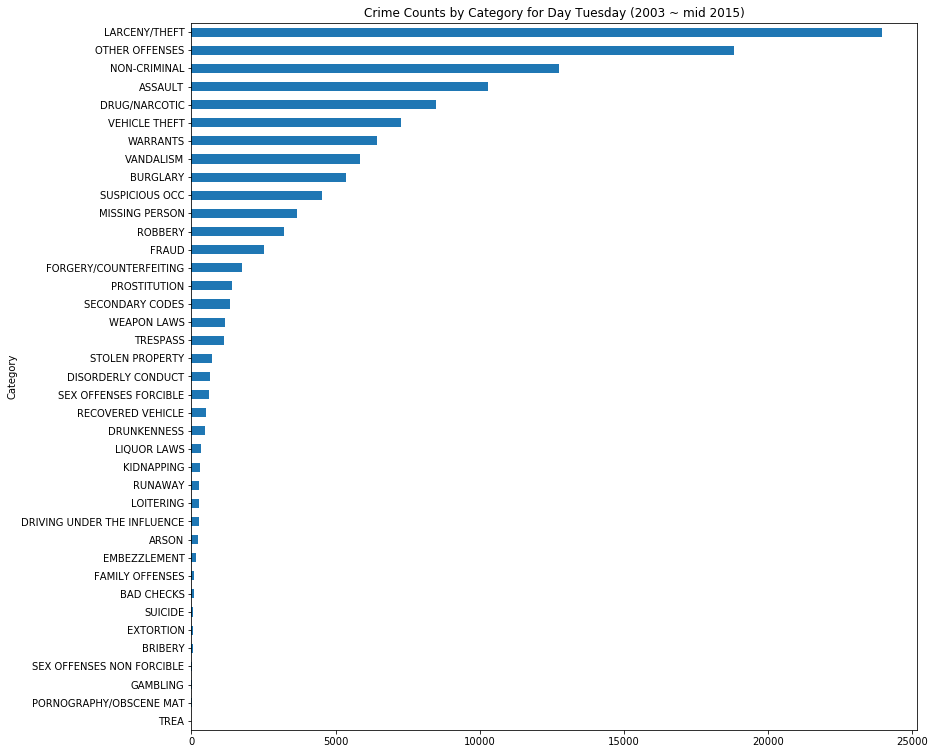

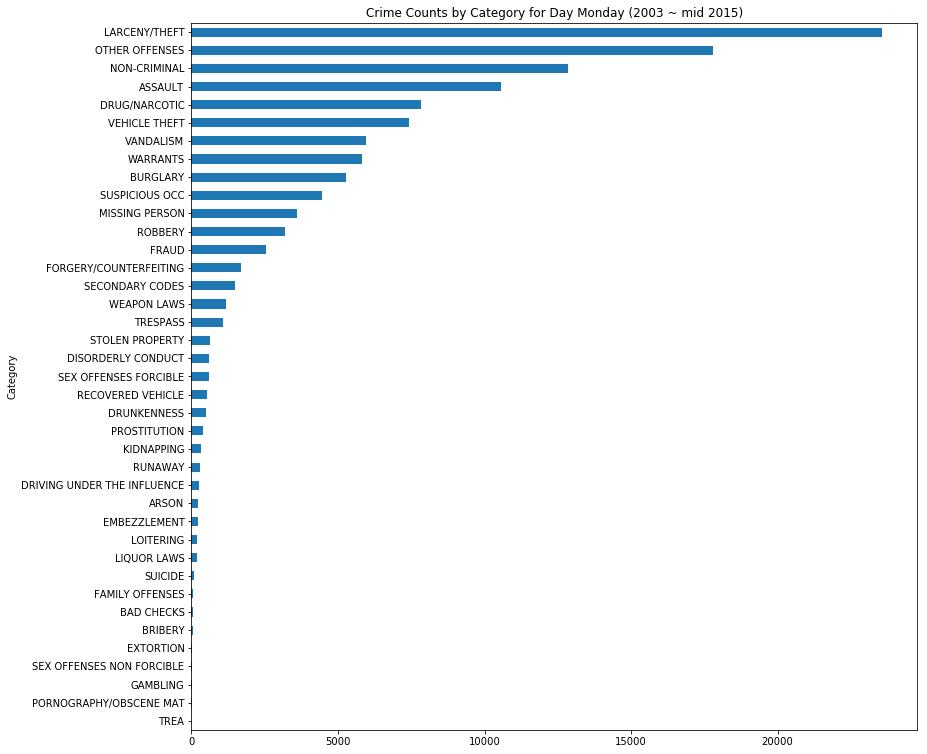

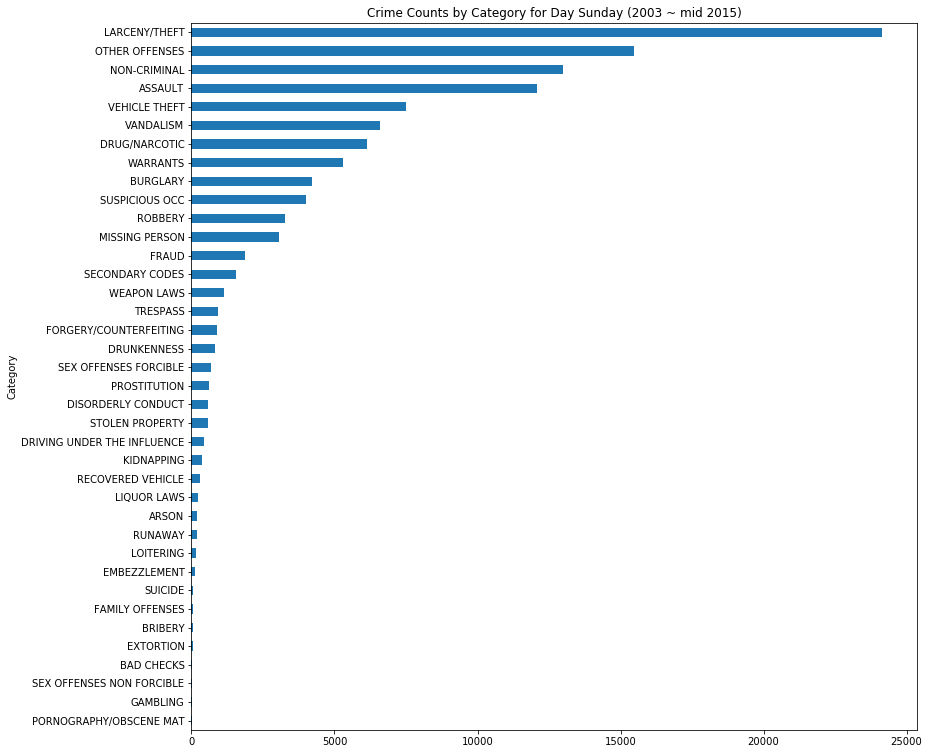

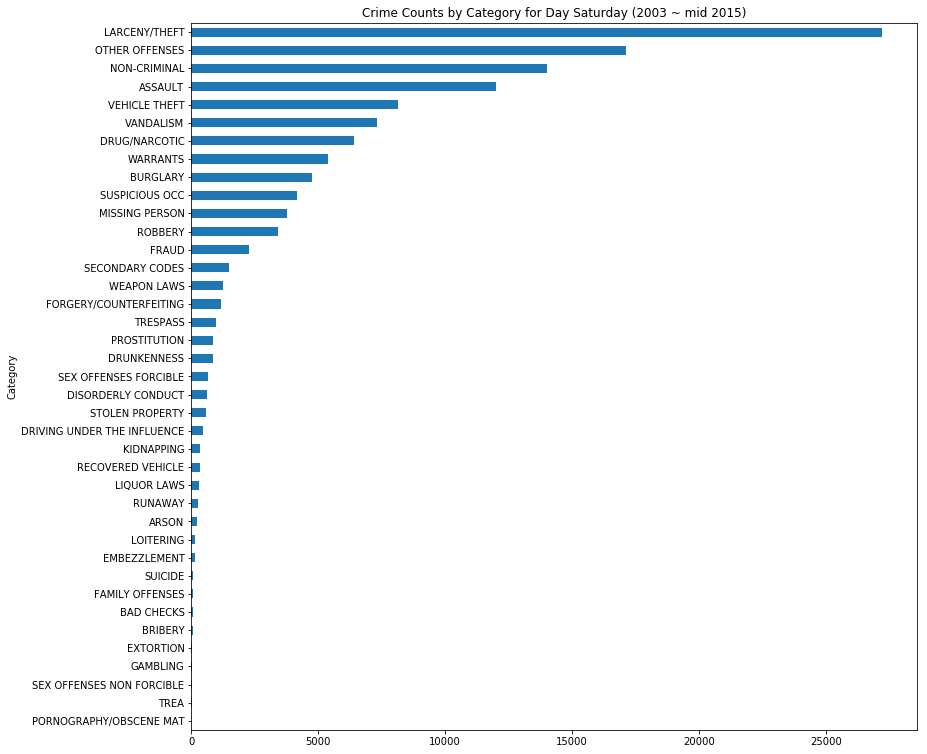

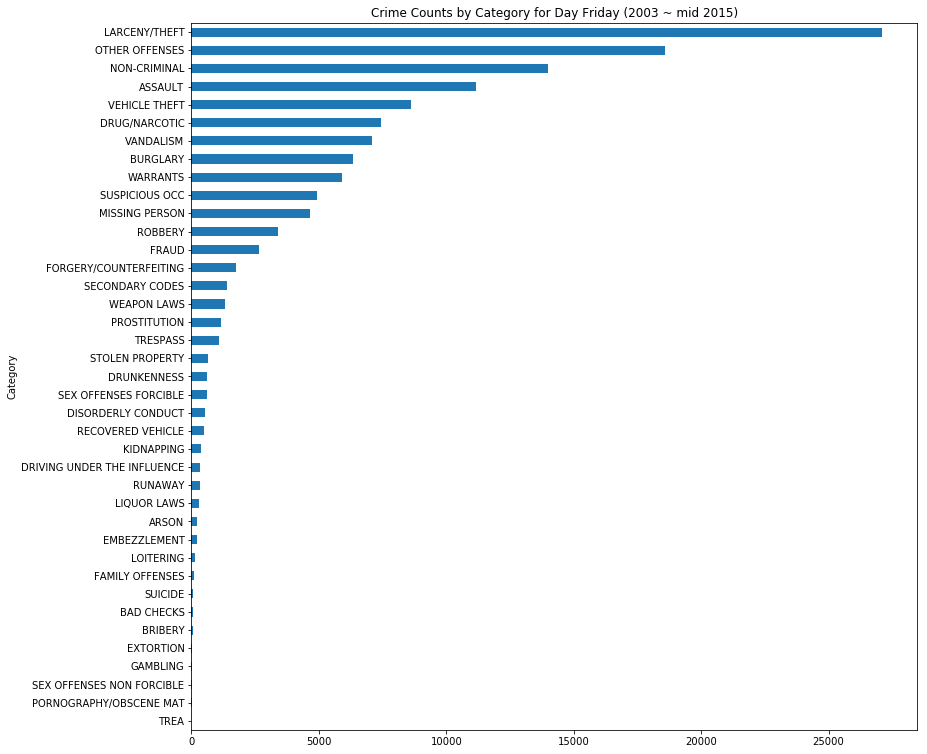

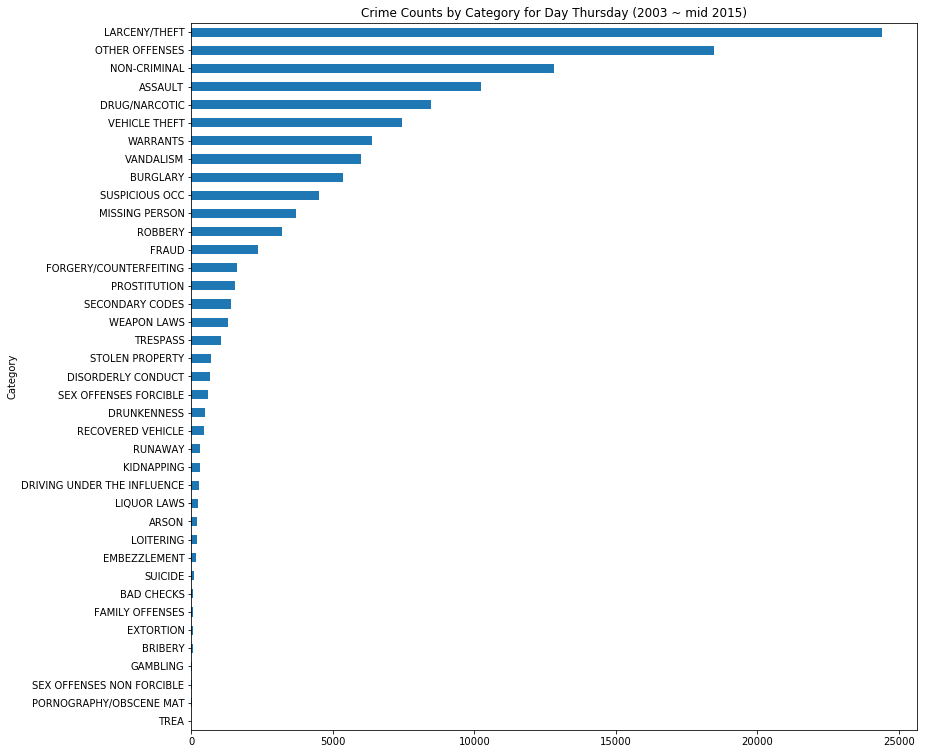

In [7]:
all_days_of_week = train_df.DayOfWeek.unique()
for d in all_days_of_week:
    gb = train_df[train_df.DayOfWeek == d].groupby('Category')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(13,13), title=f'Crime Counts by Category for Day {d} (2003 ~ mid 2015)')
    plt.show()

### Crime Categories Day vs Night

- An interesting to see, is which crimes occur mostly **by day vs by night**

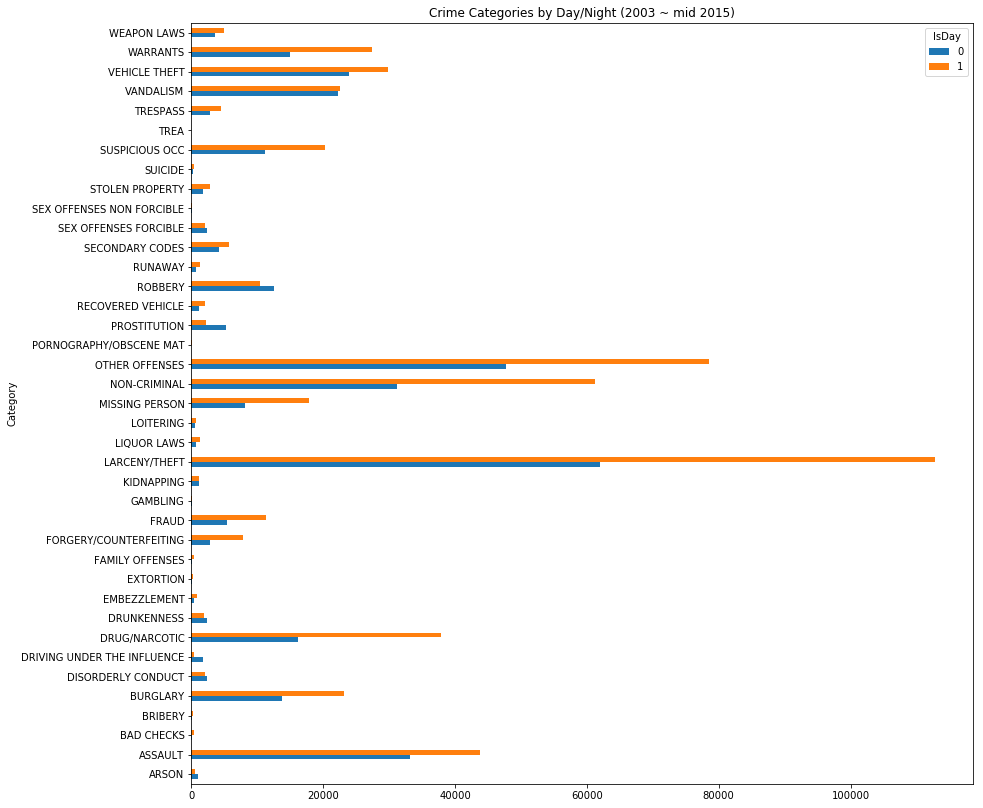

In [8]:
ct = pd.crosstab(train_df.Category, train_df.IsDay)
ct.plot(kind='barh', figsize=(14,14), title=f'Crime Categories by Day/Night (2003 ~ mid 2015)')

#### Let's check the same thing for each year

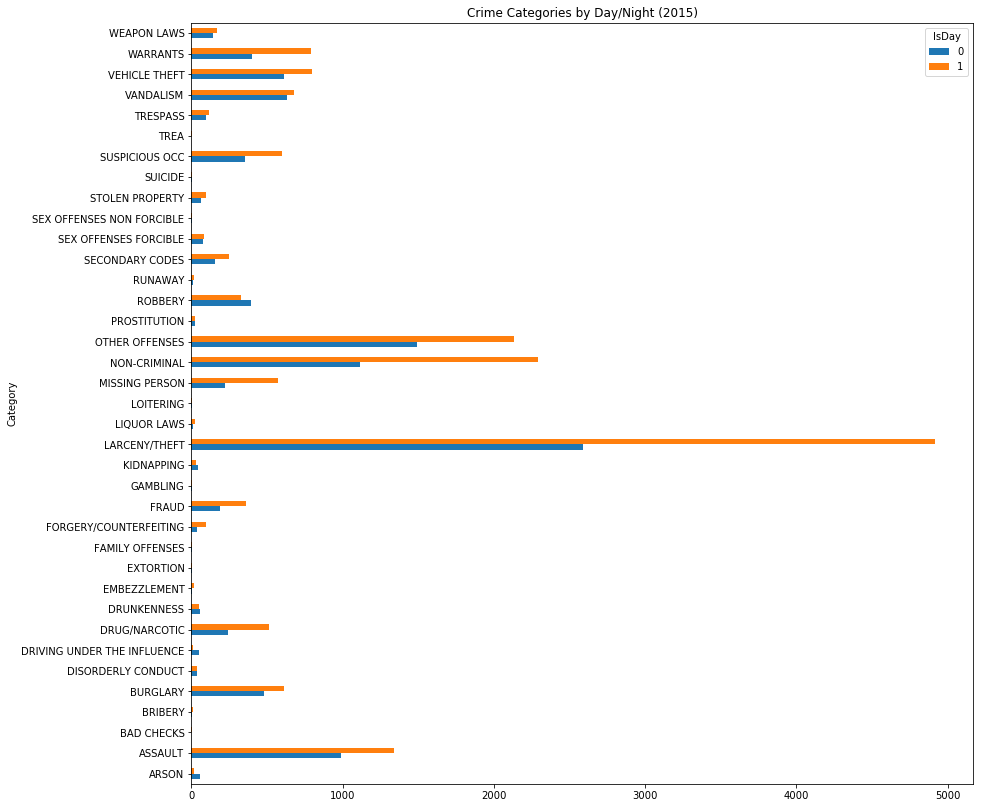

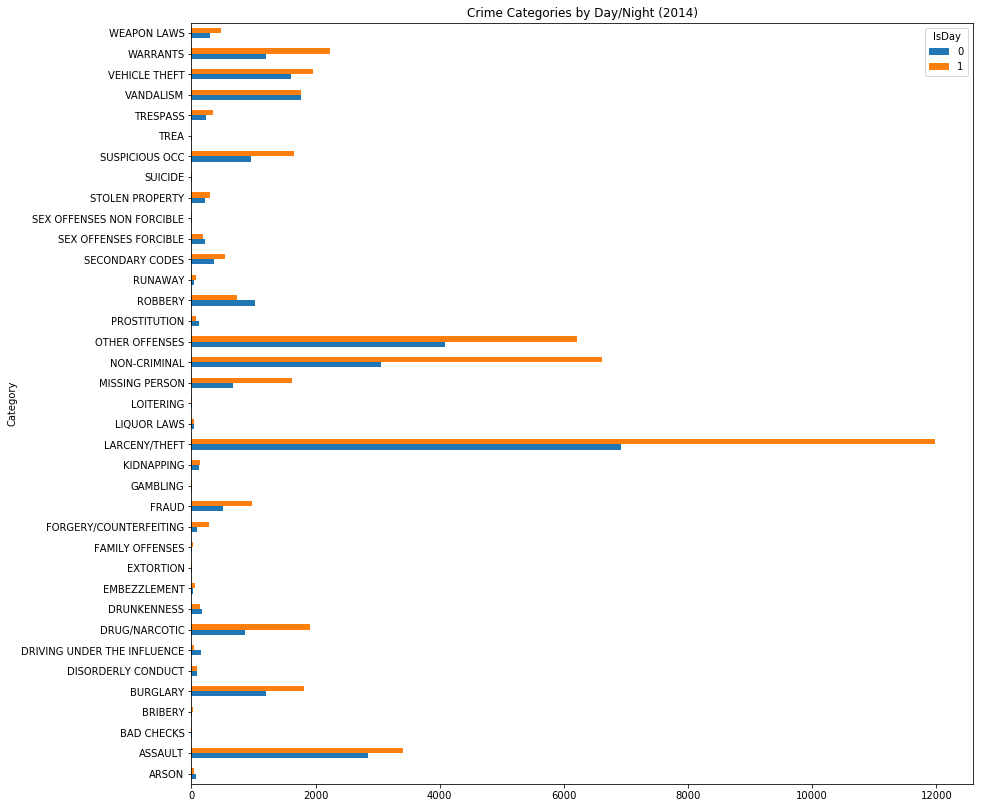

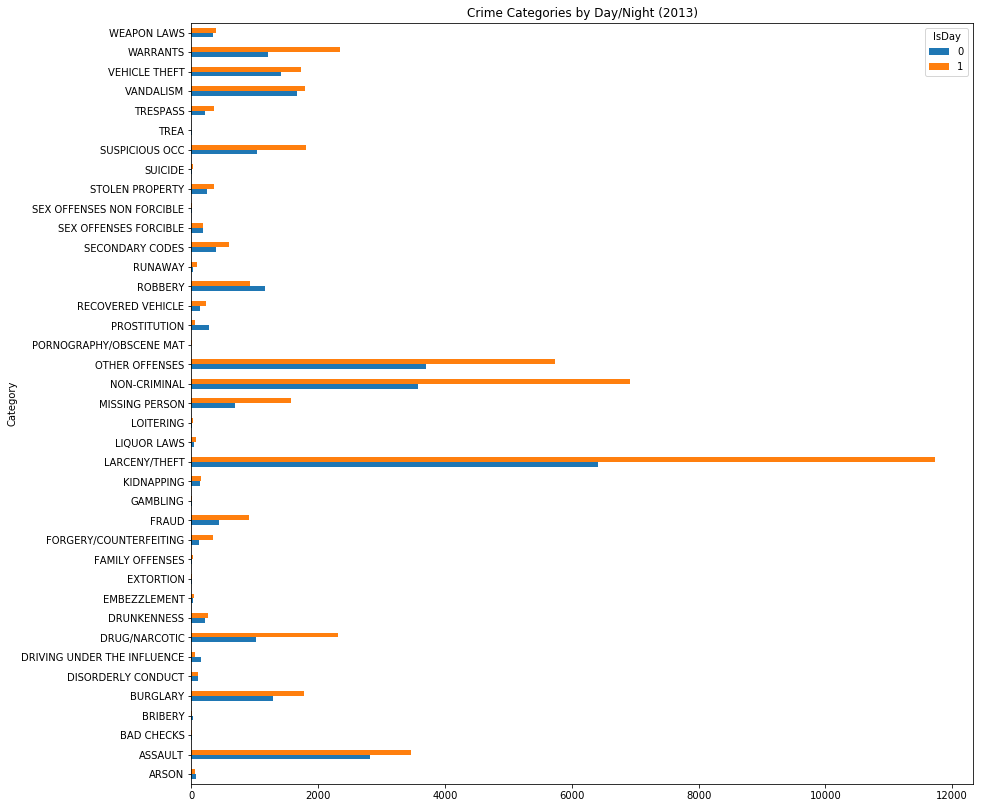

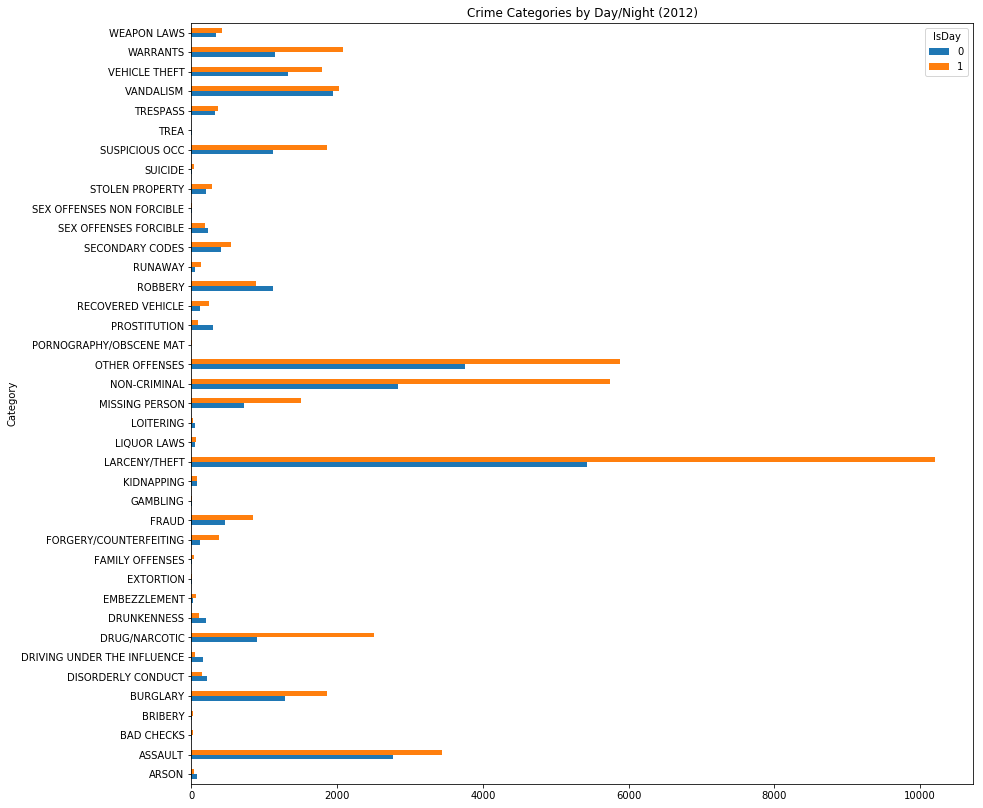

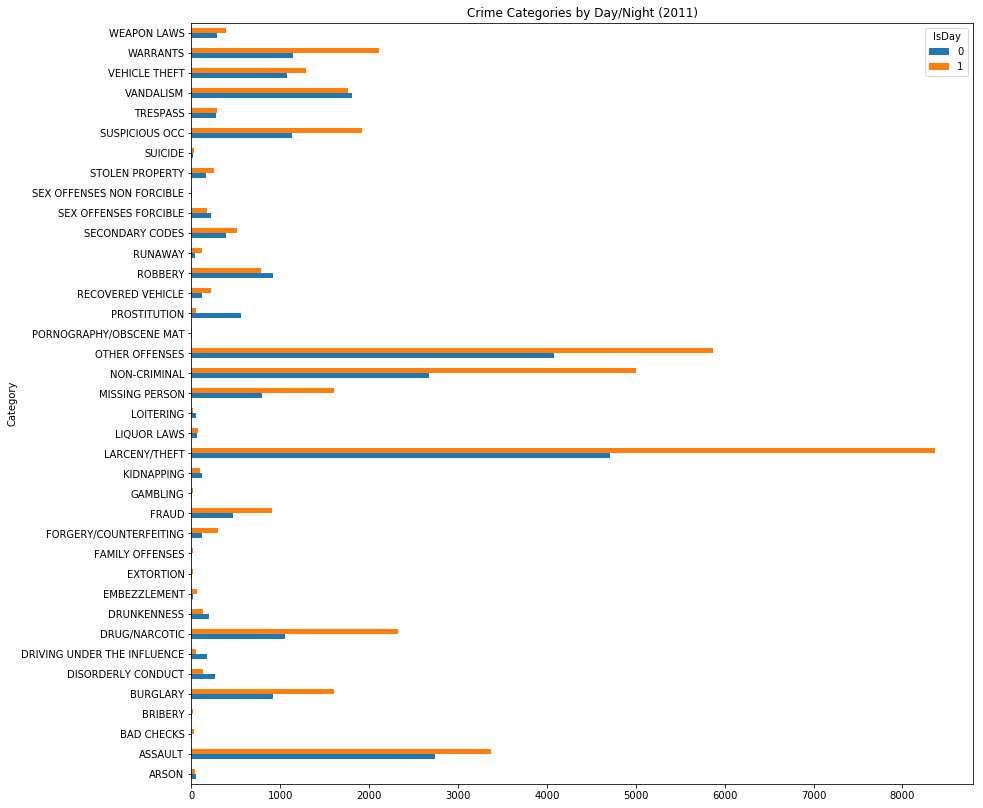

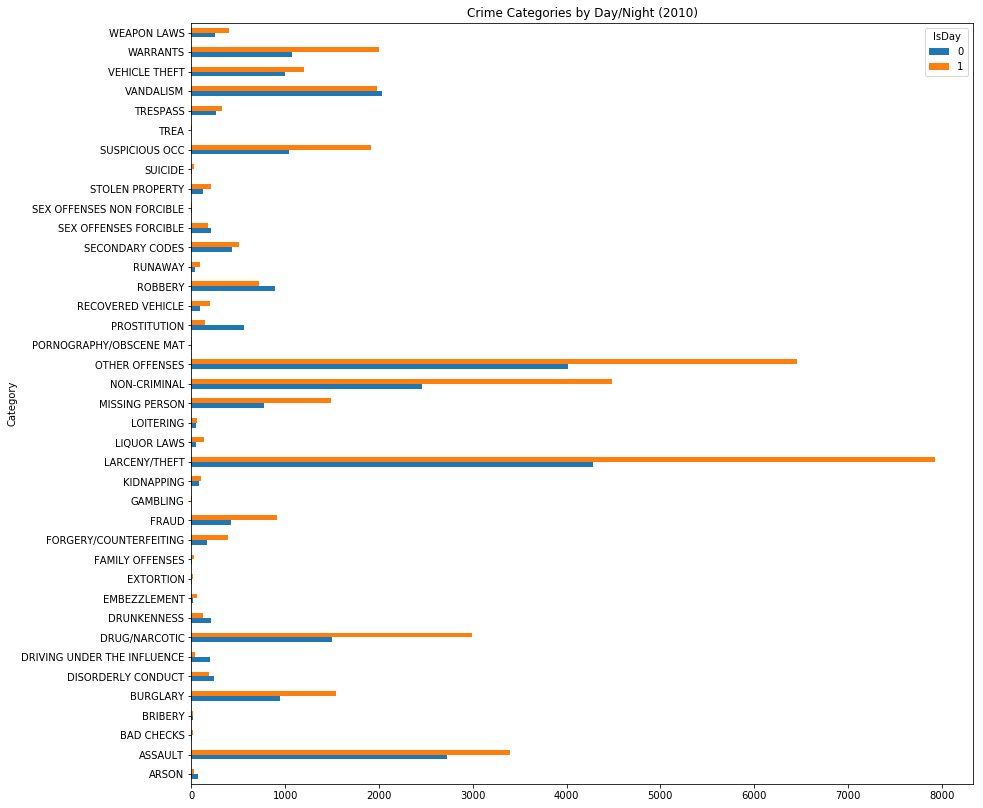

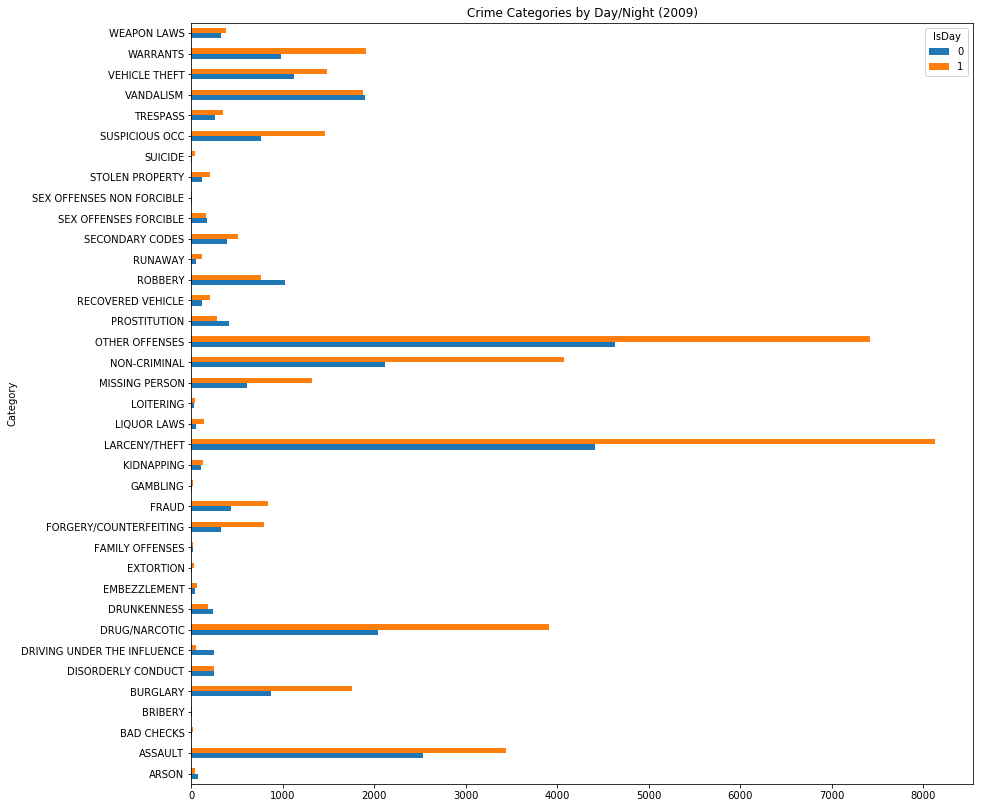

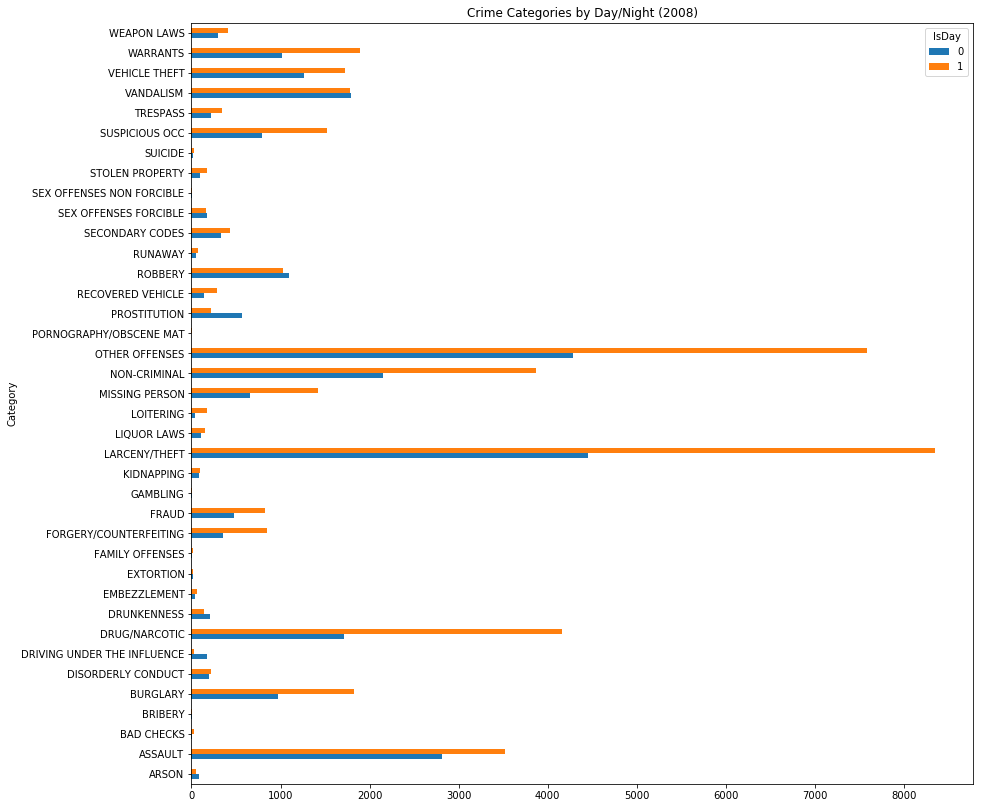

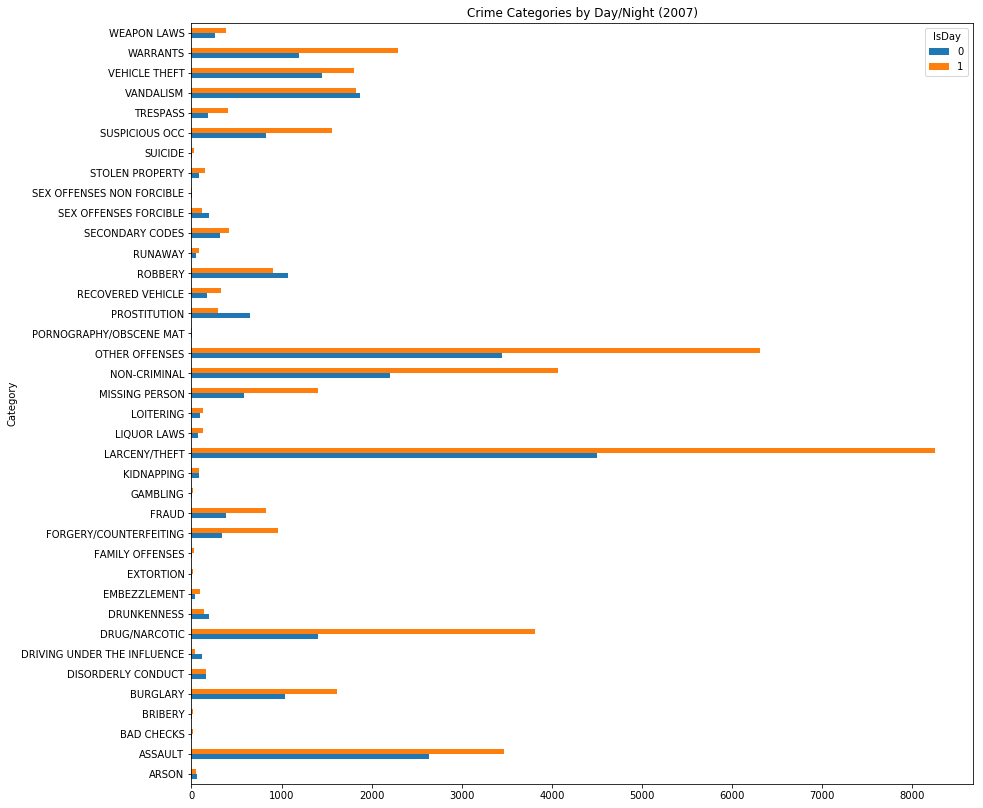

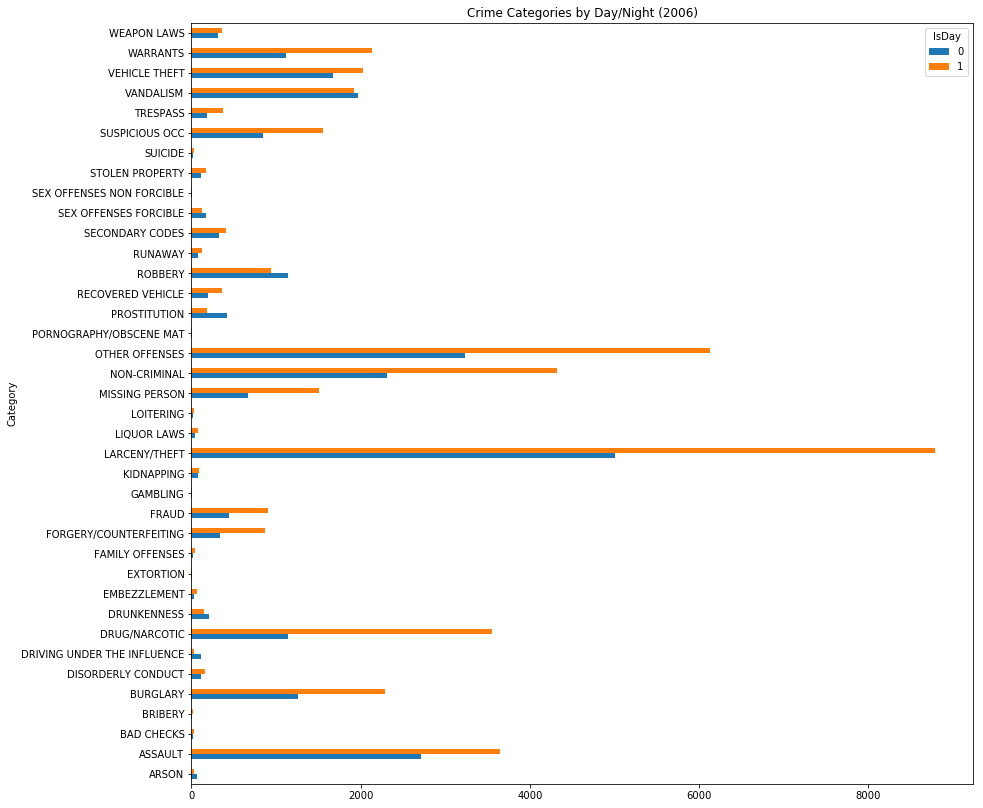

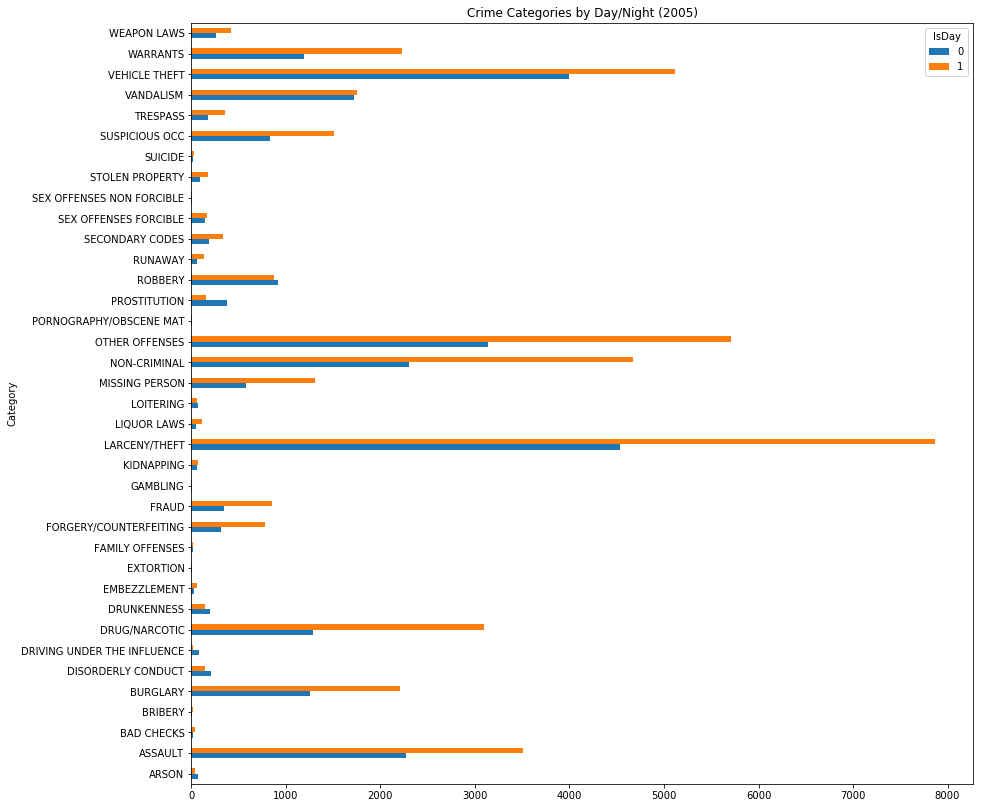

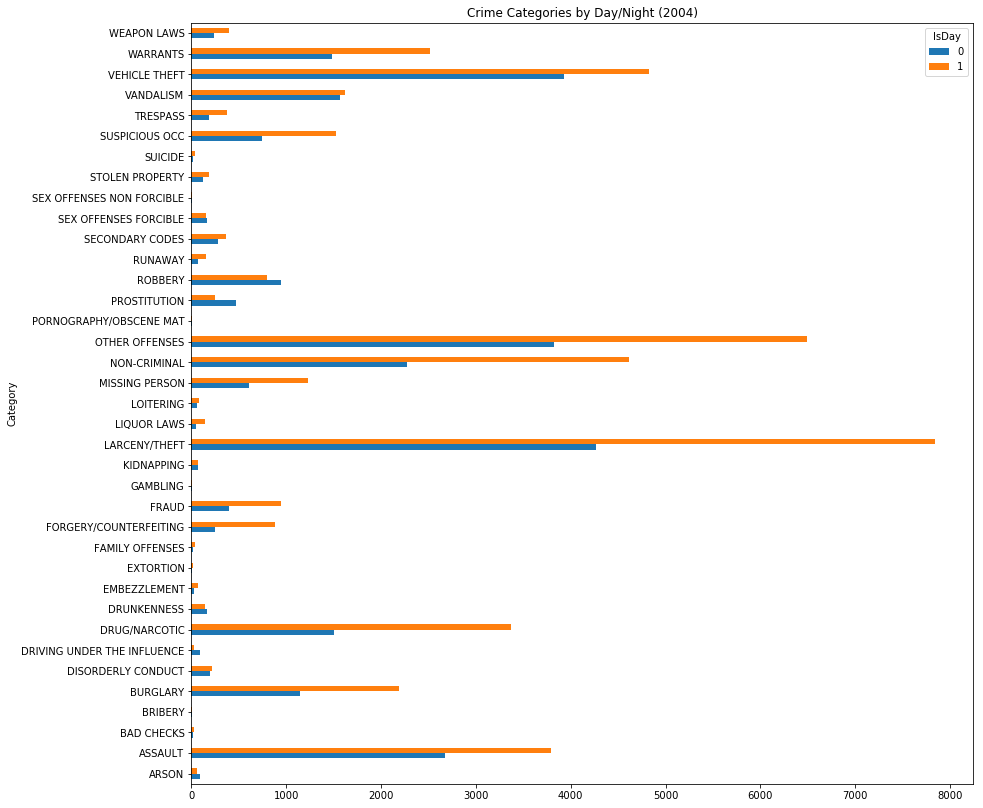

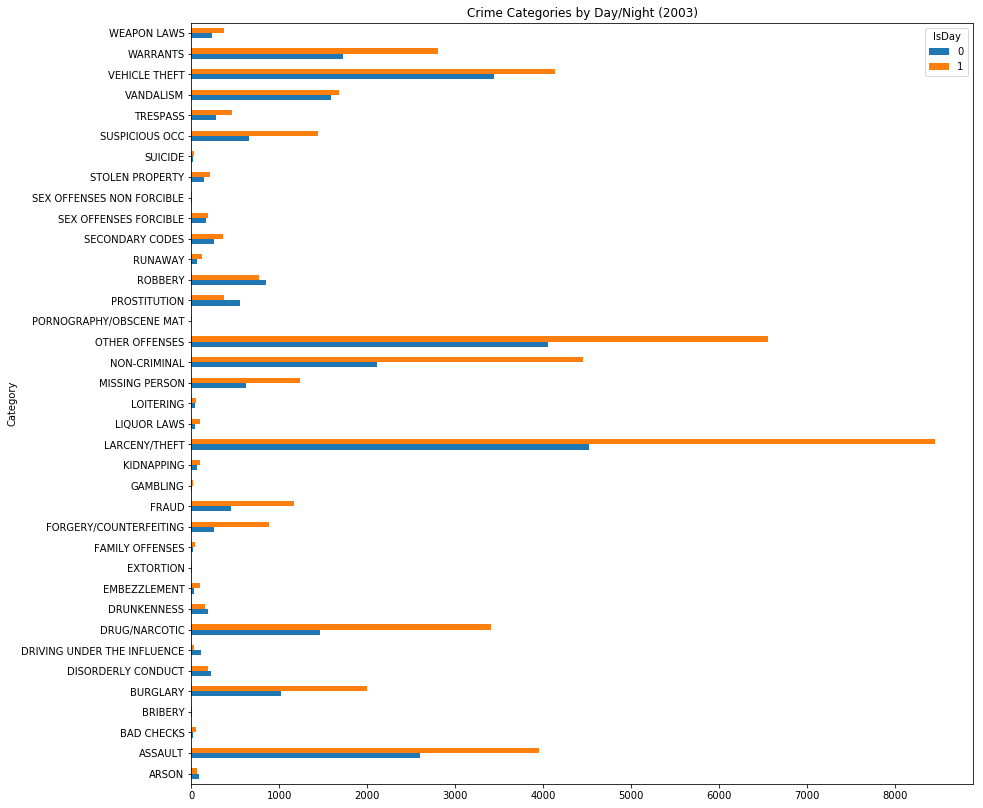

In [9]:
for y in all_years:
    ct = pd.crosstab(train_df[train_df.Year == y].Category, train_df[train_df.Year == y].IsDay)
    ct.plot(kind='barh', figsize=(14,14), title=f'Crime Categories by Day/Night ({y})')
    plt.show()

### Crime Categories by Timeslot

#### Now let's check the how crimes's categories change by time slot

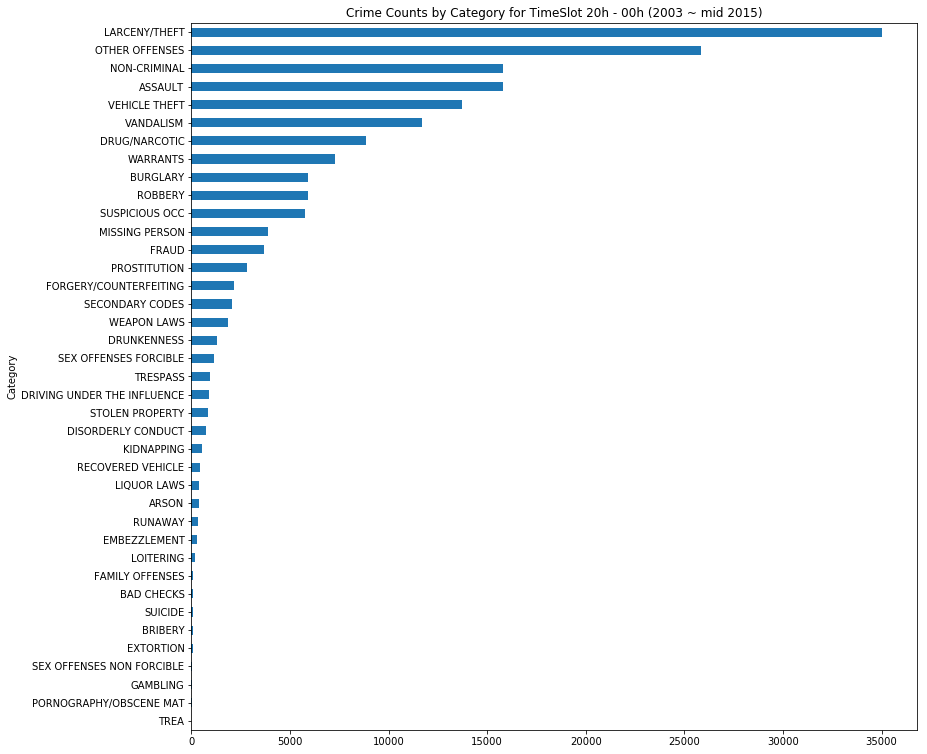

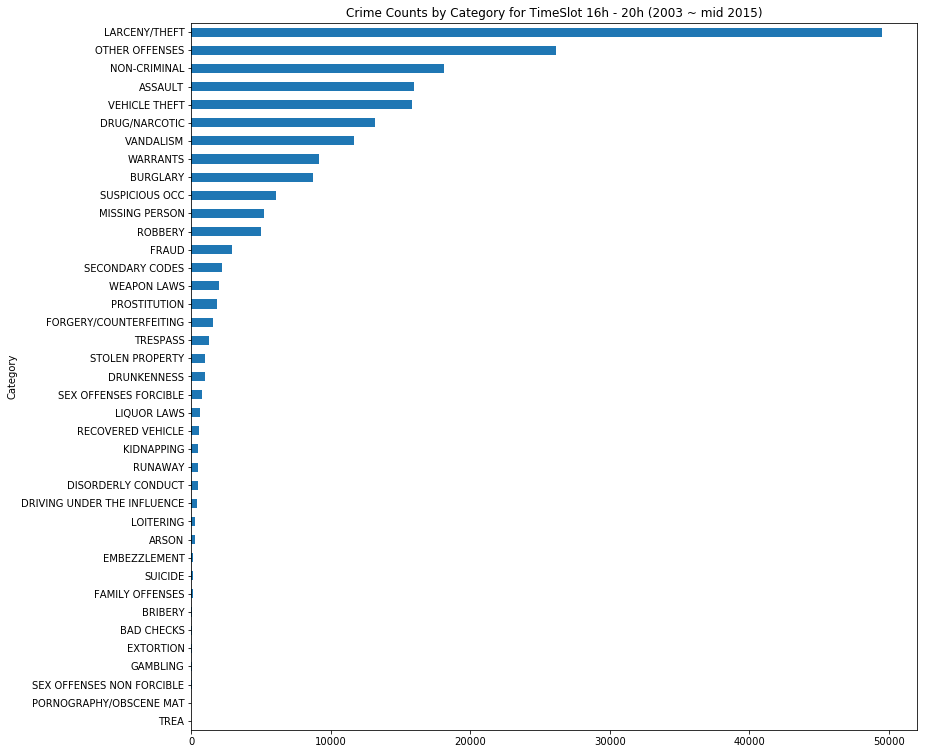

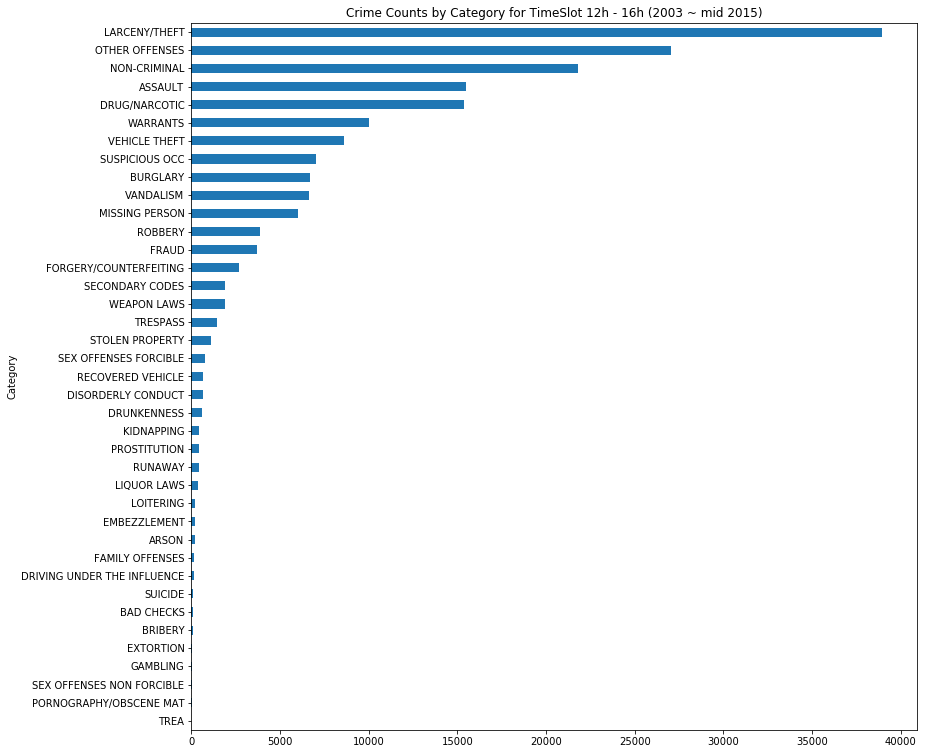

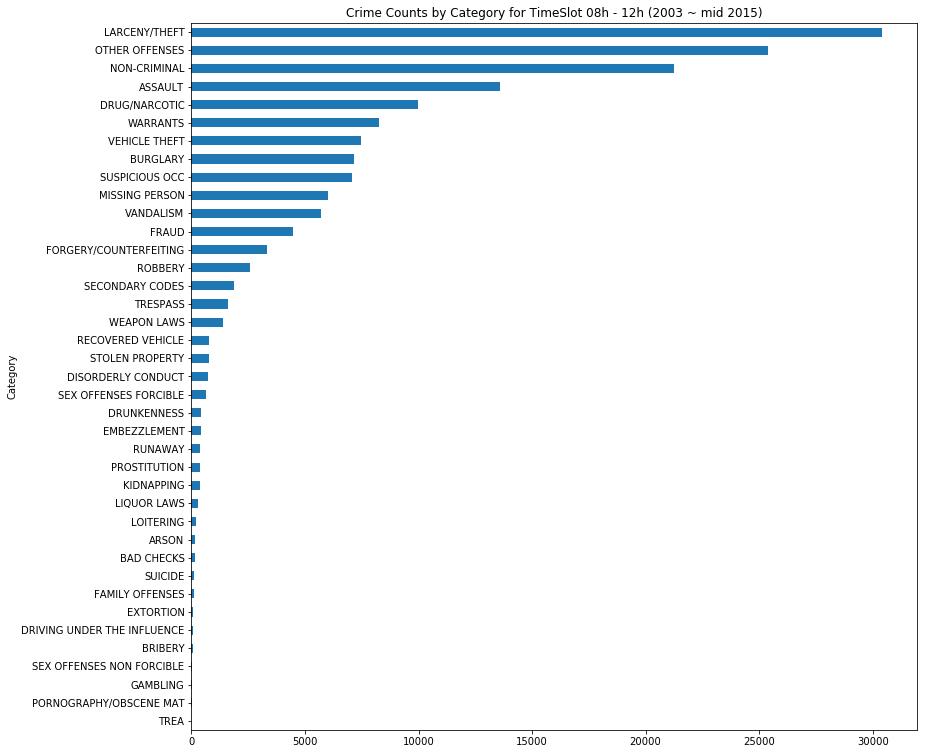

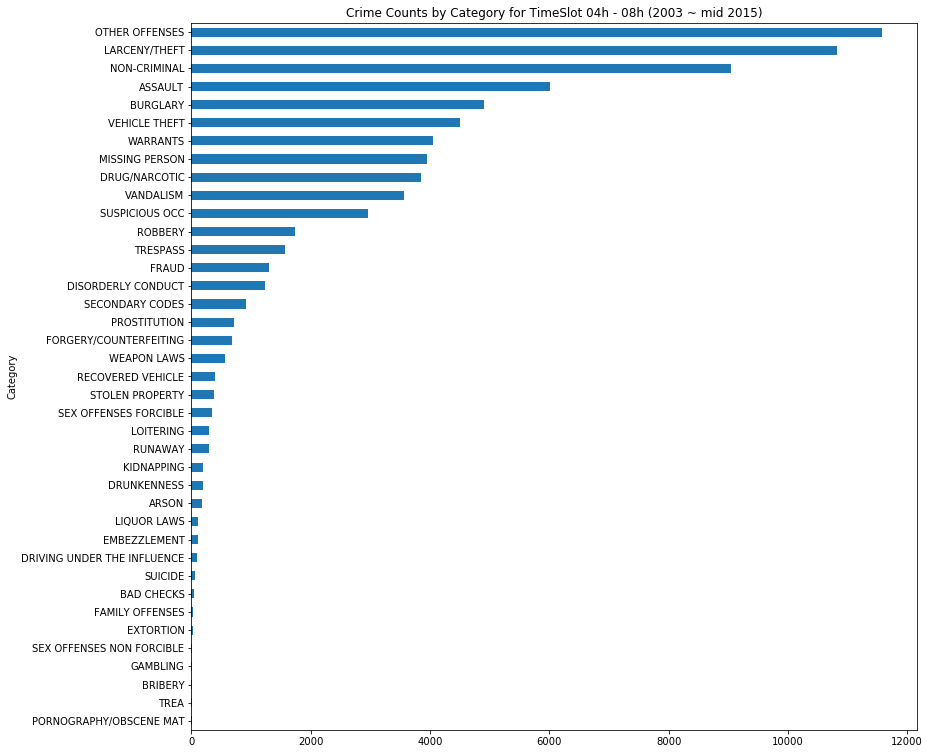

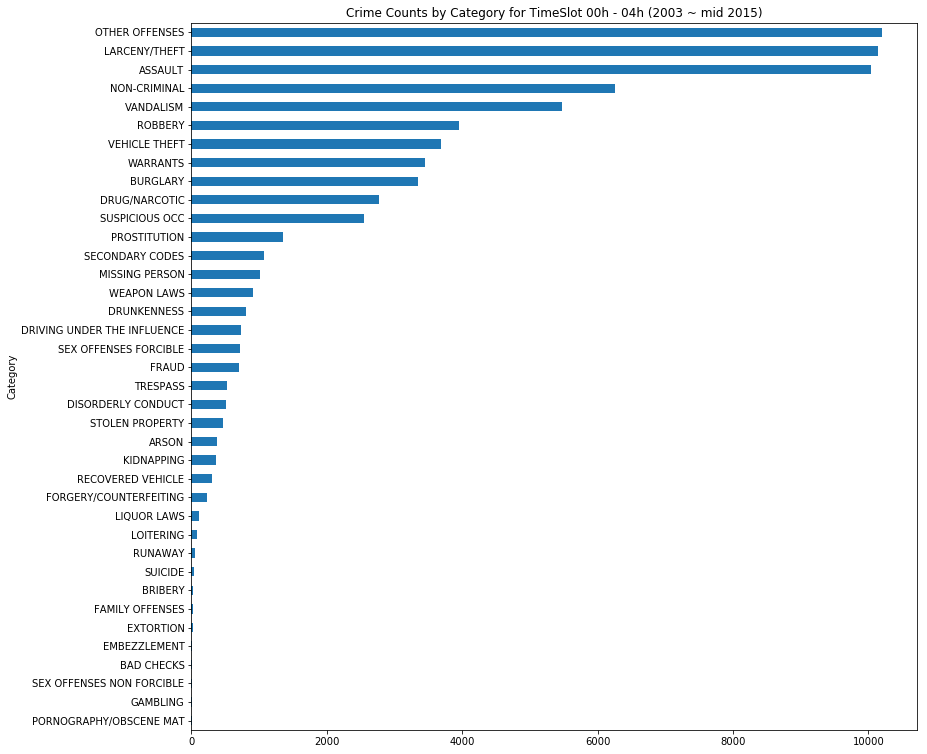

In [10]:
all_timeslots = train_df.TimeSlot.unique()
for ts in all_timeslots:
    gb = train_df[train_df.TimeSlot == ts].groupby('Category')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(13,13), title=f'Crime Counts by Category for TimeSlot {ts} (2003 ~ mid 2015)')
    plt.show()

#### We can focus on one particular category, for example Kidnapping/Robbery, and see when most of them occur

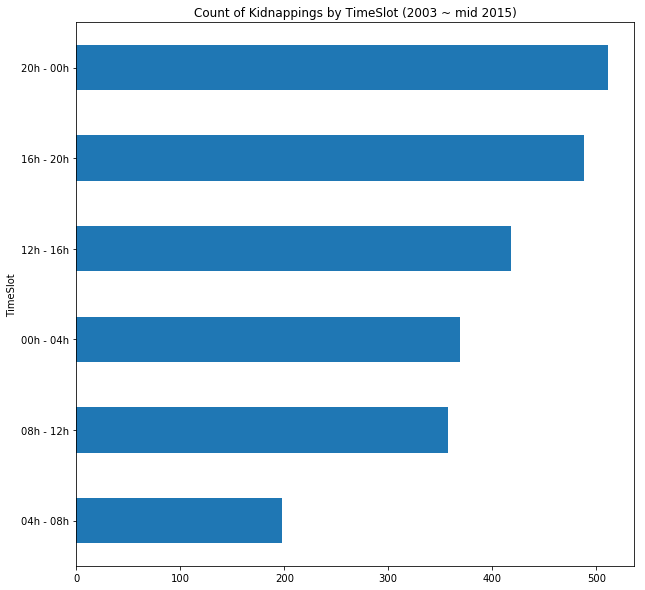

In [11]:
train_df[train_df.Category == 'KIDNAPPING'].groupby('TimeSlot')['Descript'].count().sort_values().plot(kind='barh', figsize=(10,10), title='Count of Kidnappings by TimeSlot (2003 ~ mid 2015)')

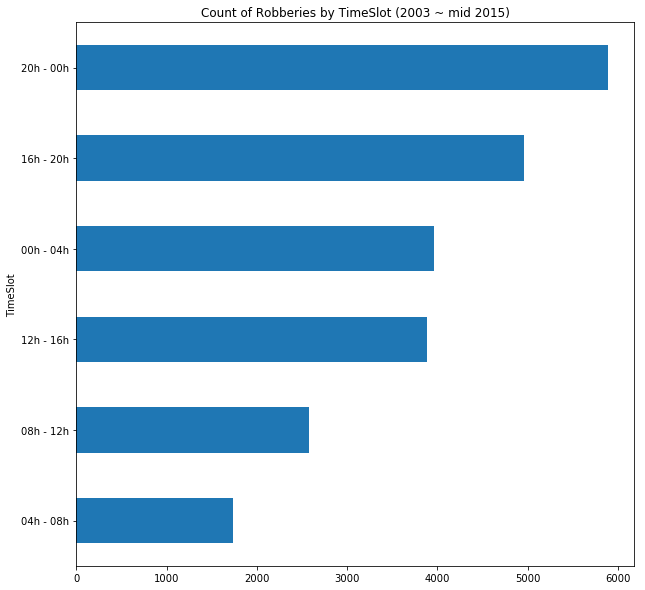

In [12]:
train_df[train_df.Category == 'ROBBERY'].groupby('TimeSlot')['Descript'].count().sort_values().plot(kind='barh', figsize=(10,10), title='Count of Robberies by TimeSlot (2003 ~ mid 2015)')

#### We can see that most of the Kidnappings and Robberies occur between 16h ~ 00h

### Dummy Encoding of the Category Column

In [13]:
train_df = pd.get_dummies(train_df, columns=['Category'])
train_df.columns

Index(['DateTime', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution',
       'Address', 'X', 'Y', 'Year', 'Month', 'Hour', 'MonthSin', 'MonthCos',
       'DayOfWeekInt', 'DayOfWeekSin', 'DayOfWeekCos', 'HourSin', 'HourCos',
       'TimeSlot', 'IsDay', 'Category_ARSON', 'Category_ASSAULT',
       'Category_BAD CHECKS', 'Category_BRIBERY', 'Category_BURGLARY',
       'Category_DISORDERLY CONDUCT', 'Category_DRIVING UNDER THE INFLUENCE',
       'Category_DRUG/NARCOTIC', 'Category_DRUNKENNESS',
       'Category_EMBEZZLEMENT', 'Category_EXTORTION',
       'Category_FAMILY OFFENSES', 'Category_FORGERY/COUNTERFEITING',
       'Category_FRAUD', 'Category_GAMBLING', 'Category_KIDNAPPING',
       'Category_LARCENY/THEFT', 'Category_LIQUOR LAWS', 'Category_LOITERING',
       'Category_MISSING PERSON', 'Category_NON-CRIMINAL',
       'Category_OTHER OFFENSES', 'Category_PORNOGRAPHY/OBSCENE MAT',
       'Category_PROSTITUTION', 'Category_RECOVERED VEHICLE',
       'Category_ROBBERY', 'Category_RU

In [14]:
# Although I didn't do any feature engineering now, I'll output a new file because I might come back and to do it
train_df.to_csv('data/inter/train_clean_2.csv', index=False)
print('Done Outputing')

Done Outputing
